In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [2]:
# import nSimplices 
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_final.py", 'exec'))

# set matplotlib default savefig directory
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above
### test data, read in a dataset of dimension 10
data = pd.read_csv(r'datasets/bdd_synthetic_rdim10.csv',sep=';',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,4.010045,7.605912,5.121693,2.012711,13.239657,0.544258,4.096576,7.954744,4.840211,-9.149928,1.989400,2.028782,1.998806,1.999819,2.007038,2.029254,1.989161,2.002128,2.009236,2.029597
1,3.001528,3.607599,-6.757307,5.864029,7.388758,7.200273,-3.970759,5.236329,3.019190,-5.869239,1.996643,2.011125,2.027733,1.974514,1.990747,2.012272,2.008546,2.008311,2.002387,2.003567
2,-0.458328,9.451292,6.094432,-2.259350,-2.666927,1.704595,2.805850,10.609370,1.933497,-5.056886,1.990291,1.988618,2.008213,2.008398,2.006818,1.995737,2.002557,1.989351,1.999557,2.001529
3,-3.071324,10.870284,16.069455,2.340153,3.915481,1.976716,0.772471,6.189006,6.882867,-6.115188,2.014134,2.002410,2.014142,1.994027,1.994113,2.013366,1.982573,2.009980,1.992397,2.007118
4,3.426358,9.121840,0.227281,2.735234,12.896083,7.165633,2.822065,21.318930,2.356204,-4.032068,1.987163,2.007985,1.970851,2.014760,1.992562,2.028419,2.009842,1.987356,2.018408,1.990408


In [3]:
### Processing datasets and computing pairwise distances
X=data
X.head()

tab=data
# print("tab shape is:", tab.shape, tab)

D=pdist(tab.copy()) # compute pairwise distance in data
D_TRUE=squareform(D) # true pairwise distance in squared form

In [4]:
### Add outliers
proportion=0.05
N=tab.shape[0]
k=int(np.ceil(proportion*N))
# random draw of outliers 
indices=np.sort(alea.sample(range(N),k))
for n in indices:
    horsplan=alea.uniform(-50,50)
    # for each row, add outliers to one of columns 10 to 15 (inclusive)
    # columns 10 to 15 are originally simulated with Guassian(2, 0.05)
    i=alea.randint(10,15)
    tab.loc[n,i] = horsplan

In [5]:

### Preparing pairwise distances

""" euclidean distances """
N=tab.shape[0] # number of rows 
D=pdist(tab) # pairwise distance in tab (with outliers added)
DSO=squareform(D) # squared matrix form of D

In [7]:

### Run nSimplices method
d=20
T1=time.time()
dico_outlier,rdim,cdata_proj=nSimplices(DSO,d,n0=1,nf=13)
T2=time.time()
print(T2-T1)

22.400492701534592
correction of outliers
[[ 8.05717778e-02  1.92630169e-01 -6.51641041e-02  1.02340617e-01
   3.23044561e-01 -3.92865375e-01 -1.95302030e-01 -3.51966820e-01
  -4.62155457e-01  1.73751503e-01 -5.36673088e-02  1.14070615e-01
  -1.31500046e-01 -4.01674896e-01 -2.03319508e-02  1.84494868e-01
  -5.55436751e-02  2.73054827e-03  2.12387165e-01 -4.47057434e-04]
 [-7.11745625e-02  2.14764335e-02 -3.59694999e-01  2.62690844e-01
  -1.72218477e-01  1.36426329e-01 -4.04892232e-01  1.28551619e-01
  -1.26791095e-01  1.53805925e-01 -1.30105722e-01  2.01913024e-01
  -6.81219318e-02  2.80592754e-01 -3.29294917e-02  9.75419856e-02
  -3.69529227e-01  4.15909034e-01 -1.18346250e-01  2.28939040e-01]
 [ 3.05503140e-02  5.61892168e-02 -2.07702378e-01  4.68879873e-01
   7.55231025e-02 -2.91414136e-01 -2.59066622e-01  6.57821507e-02
   2.60221786e-01  1.10575591e-01 -1.78092407e-01 -4.81206613e-01
   2.65721957e-01  9.25206973e-03  1.45968601e-01 -4.09452469e-02
   3.22487952e-01 -1.11493891e-0

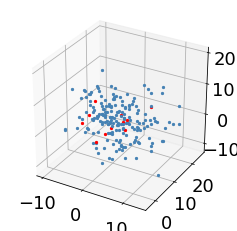

tab shape is: (200, 20)
cdata_proj shape is: (200, 200)


In [20]:
### Section 2.1.2
### Plot in 3D using the first three dimensions - Fig.3(A) 
# (TODO: not exactly the same as in the manuscript)

tab = data
coord=np.array(tab)
ttab=np.array(coord)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')

for i in range(200):
    e=ttab[i]
    if (i in inlist):
        ax.scatter(e[0],e[1],0, s = 5,color='red')
        ax.scatter(e[0],e[1],e[2], s = 5,color=[1,1,1,0])
    else:
        ax.scatter(e[0],e[1],e[2], s = 5,color
        ='steelblue')
plt.show()

print("tab shape is:", tab.shape)

print("cdata_proj shape is:", cdata_proj.shape)


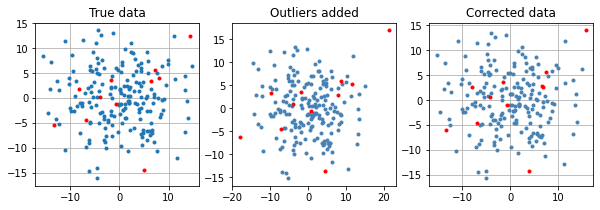

In [12]:
### Section 2.1.2
### Plot in 2D using the two largest eigenvalues - Fig.3(B) dimensionality inference
# (TODO: not exactly the same as in the manuscript)

inlist=dico_outlier # list of outliers
notinlist=[i for i in range(200) if i not in inlist] # list of normal points 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))

# plot original graph
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[notinlist,0],Xe[notinlist,1],'.')
ax1.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
ax1.set_title("True data")
ax1.grid()

# plot original graphs with outliers added 
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax2.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
ax2.set_title("Outliers added")
va, ve, Xe = cMDS(cdata_proj)   

# plot correct outliers 
ax3.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax3.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
ax3.set_title("Corrected data")
ax3.grid()
plt.show()

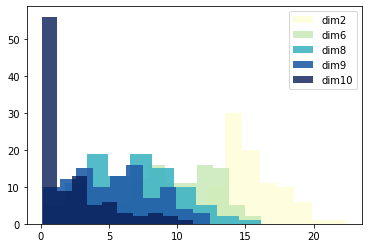

In [13]:
### Importance of dimension correction in higher dimension - Fig.4(A) height distribution 
# (TODO: not exactly the same as in the manuscript)
N=200
B=100

hcolls = []
start_dim = 2
end_dim = 15
for dim in range(start_dim, end_dim+1):
    _, hcoll = DrawNSimplices(DSO,N,B,0,dim)
    hcolls.append(hcoll)


blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
# select a few dimensions (i.e. 2,6,8,9,10) for demonstrating the distributions of heights
plt.hist(hcolls[2-start_dim],label='dim2',color=blues[0])
plt.hist(hcolls[6-start_dim],label='dim6',color=blues[1])
plt.hist(hcolls[8-start_dim],label='dim8',color=blues[2])
plt.hist(hcolls[9-start_dim],label='dim9',color=blues[3])
plt.hist(hcolls[10-start_dim],label='dim10',color=blues[4])
plt.legend()
plt.show()


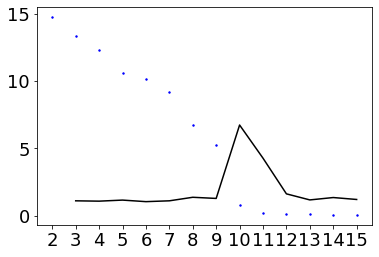

In [18]:
### Importance of dimension correction in higher dimension - Fig.4(B) dimensionality inference
# (TODO: not exactly the same as in the manuscript)


# calculate median heights for tested dimension from start_dim to end_dim
h_meds = []
for hcoll in hcolls:
    h_meds.append(np.median(hcoll))

# calculate the ratio, where h_med_ratios[i] corresponds to h_meds[i-1]/h_meds[i]
# which is the (median height of dim (i-1+start_dim))/(median height of dim (i+start_dim))
h_med_ratios = []
for i in range(1, len(hcolls)):
    h_med_ratios.append(h_meds[i-1]/h_meds[i])

# plot the height scatterplot and the ratios

plt.figure()
plt.scatter(list(range(start_dim, end_dim+1)), h_meds, c ="blue", s=2)
plt.plot(list(range(start_dim+1, end_dim+1)), h_med_ratios, c="black")
plt.xticks(np.arange(start_dim, end_dim+1, 1))
plt.show()

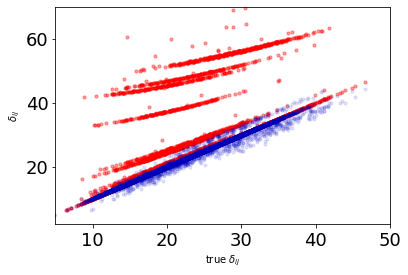

In [17]:
### Importance of dimension correction in higher dimension - Fig.4(C) Shepard Diagram
# (TODO: not exactly the same as in the manuscript)

DSO_flat=DSO.flatten() # [200*200]
D_TRUE_flat=D_TRUE.flatten()
cdata_proj_flat=cdata_proj.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(D_TRUE_flat,DSO_flat,color='red',alpha=0.2,s=10)
plt.scatter(D_TRUE_flat,cdata_proj_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()
